In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import ipywidgets
from ipywidgets import interact
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
import pickle

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df['label'].value_counts()

cotton         100
coconut        100
maize          100
grapes         100
mungbean       100
kidneybeans    100
lentil         100
rice           100
blackgram      100
chickpea       100
mothbeans      100
jute           100
orange         100
watermelon     100
coffee         100
mango          100
muskmelon      100
pomegranate    100
pigeonpeas     100
apple          100
banana         100
papaya         100
Name: label, dtype: int64

In [8]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

<AxesSubplot:>

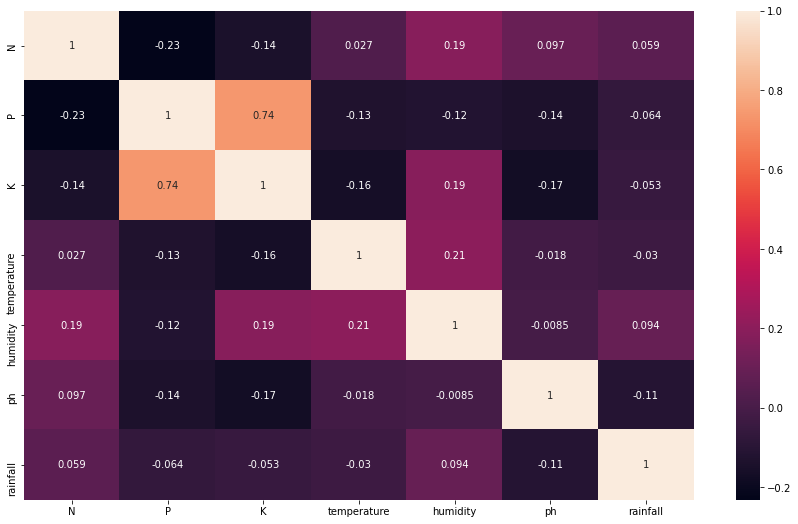

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(),annot=True)

In [10]:
@interact
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('cotton', 'coconut', 'maize', 'grapes', 'mungbean…

In [11]:
@interact

def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(df[df[conditions] > df[conditions].mean()]['label'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

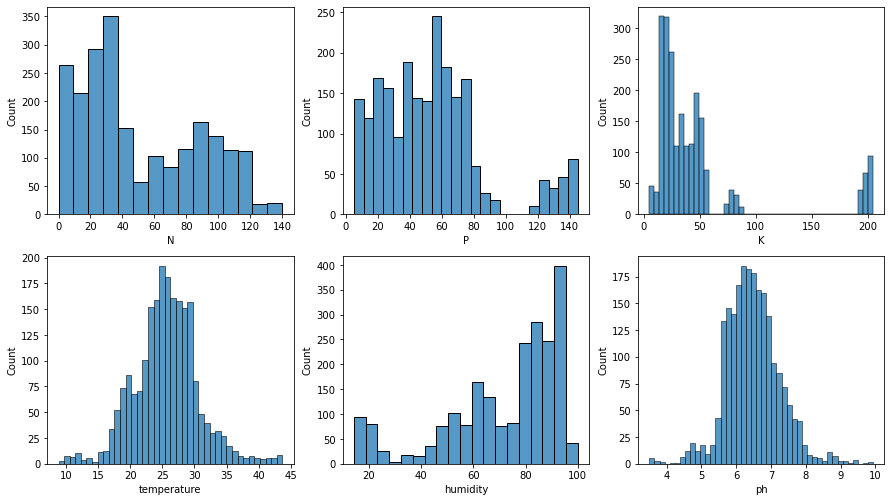

In [12]:
UnivariantAnalCol = df.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in UnivariantAnalCol[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(df[column])
    i+=1
plt.show()

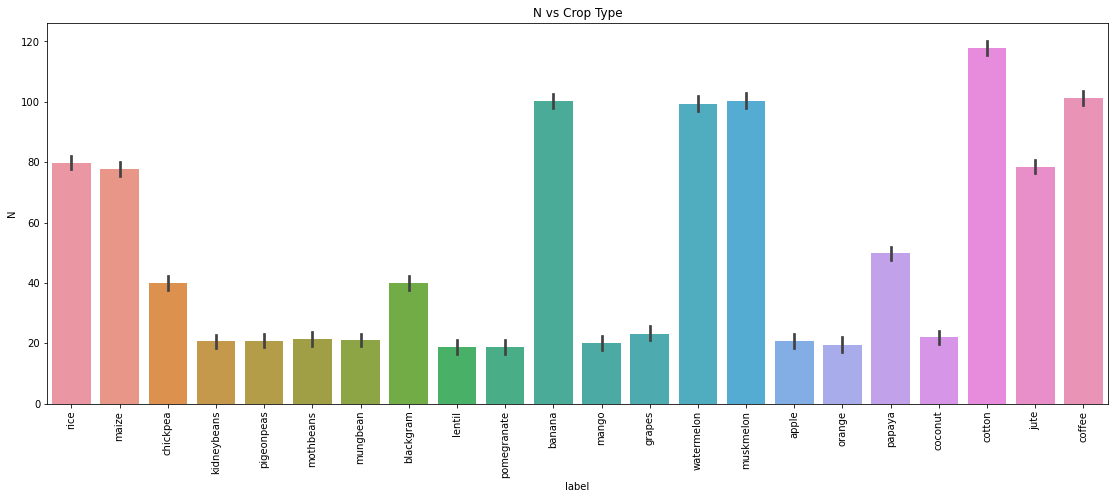

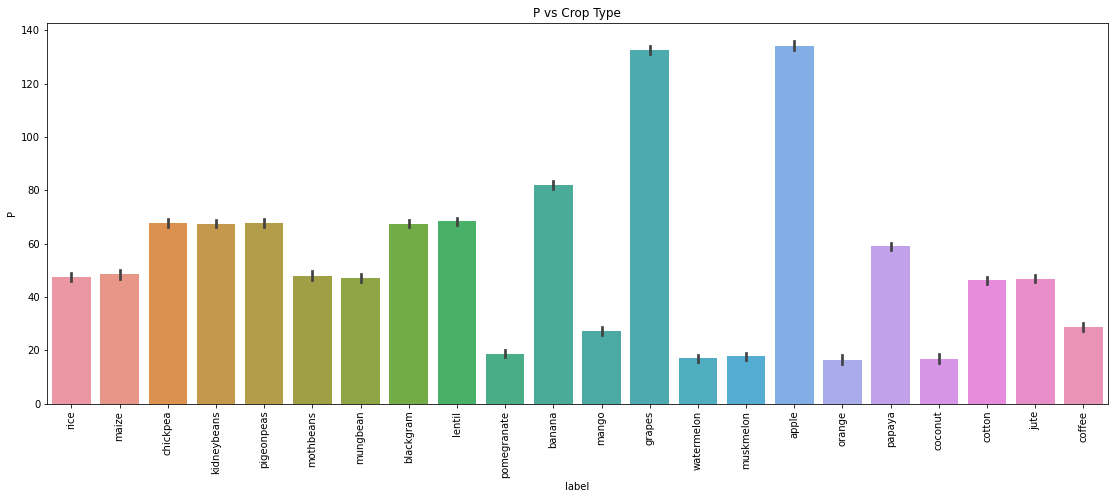

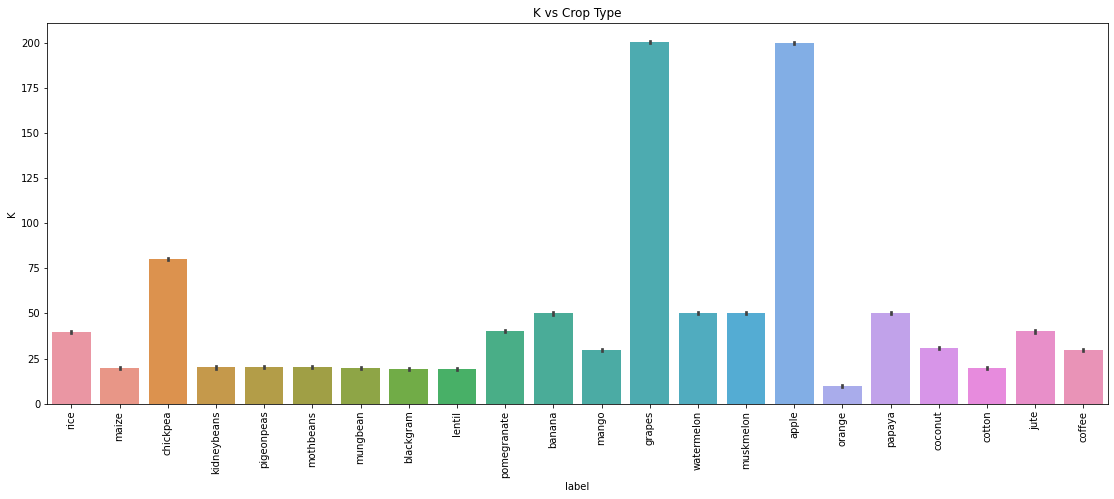

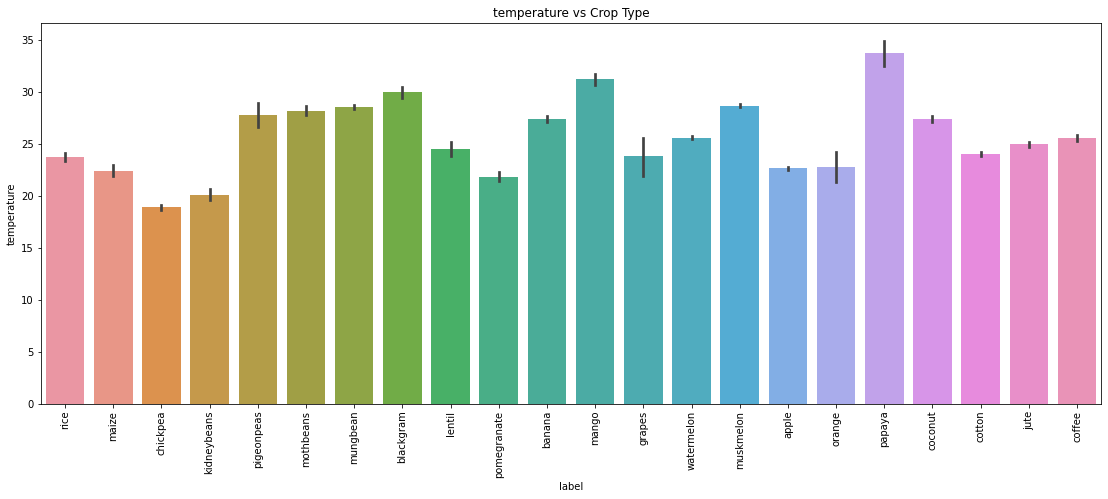

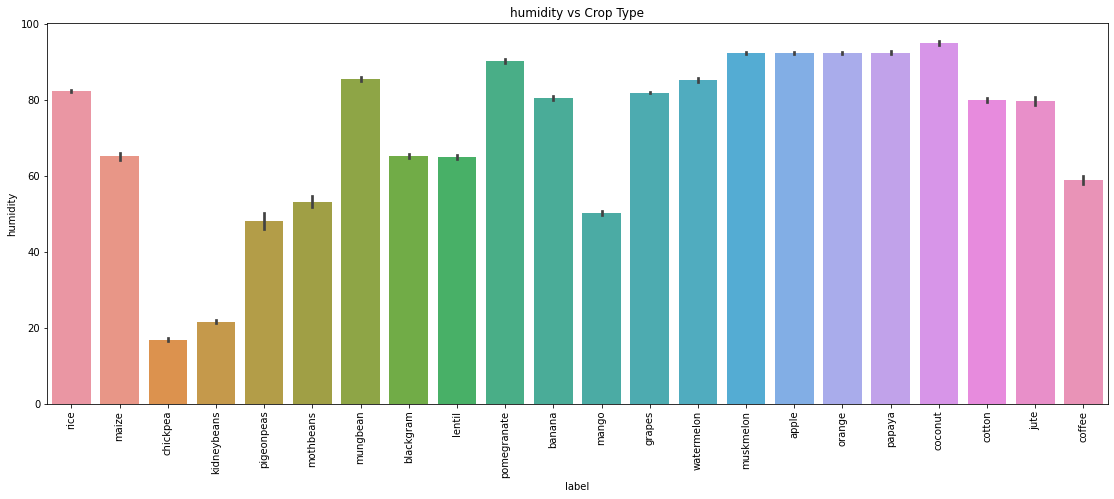

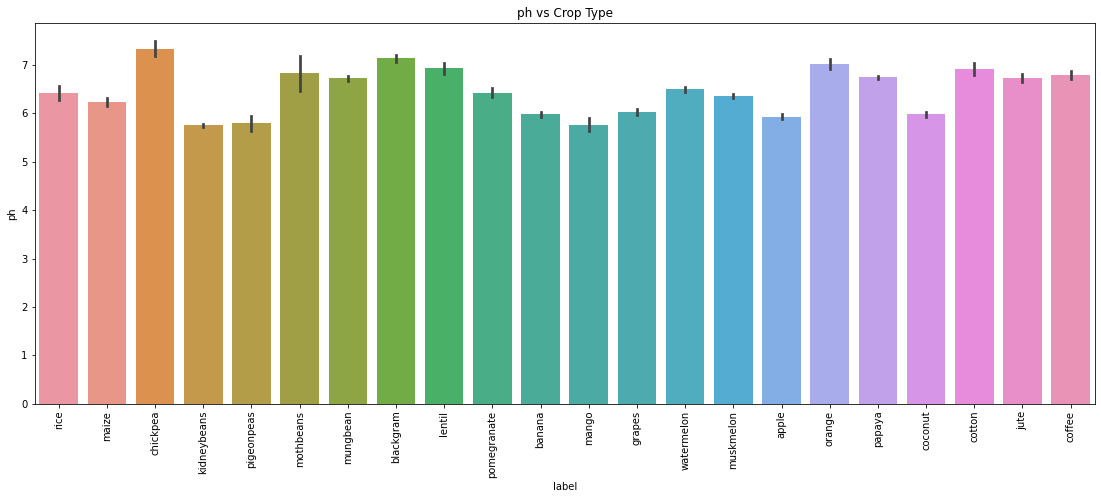

In [13]:
BivaraintAnalCol = df.columns[:-2]

for column in BivaraintAnalCol:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = column, data = df)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

In [14]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [15]:
ML_models = []
Model_Accuracies = []

In [16]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [17]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [18]:
# Cross validation score for DecisionTree
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [19]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [20]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

## Finding the Best Value for Hyperparameter

Accuracy at N = 1 is 0.990909090909091
Accuracy at N = 2 is 0.990909090909091
Accuracy at N = 3 is 0.990909090909091
Accuracy at N = 4 is 0.990909090909091
Accuracy at N = 5 is 0.990909090909091
Accuracy at N = 6 is 0.990909090909091
Accuracy at N = 7 is 0.990909090909091
Accuracy at N = 8 is 0.990909090909091
Accuracy at N = 9 is 0.990909090909091
Accuracy at N = 10 is 0.990909090909091
Accuracy at N = 11 is 0.990909090909091
Accuracy at N = 12 is 0.990909090909091
Accuracy at N = 13 is 0.990909090909091
Accuracy at N = 14 is 0.990909090909091
Accuracy at N = 15 is 0.990909090909091
Accuracy at N = 16 is 0.990909090909091
Accuracy at N = 17 is 0.990909090909091
Accuracy at N = 18 is 0.990909090909091
Accuracy at N = 19 is 0.990909090909091
Accuracy at N = 20 is 0.990909090909091
Accuracy at N = 21 is 0.990909090909091
Accuracy at N = 22 is 0.990909090909091
Accuracy at N = 23 is 0.990909090909091
Accuracy at N = 24 is 0.990909090909091
Accuracy at N = 25 is 0.990909090909091
Accuracy 

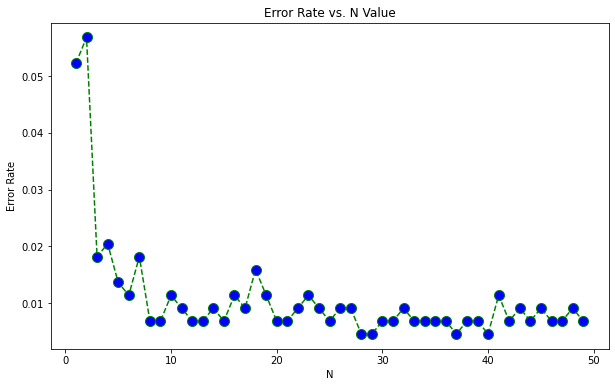

In [21]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = i))
    pipeline.fit(Xtrain, Ytrain)
    predictions = pipeline.predict(Xtest)
    accuracy = accuracy_score(Ytest, predicted_values)
    print(f"Accuracy at N = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != Ytest))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='green', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. N Value')
plt.xlabel('N')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at N =",error_rate.index(min(error_rate))+1)

In [22]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [23]:
# Cross validation score Random Forest
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [24]:
ord_enc = OrdinalEncoder()
df["encodedLabel"] = ord_enc.fit_transform(df[["label"]])
df

,N,P,K,temperature,humidity,ph,rainfall,label,encodedLabel
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20.0
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5.0


In [25]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['encodedLabel']
labels = df['label']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [26]:
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        16
         3.0       1.00      1.00      1.00        21
         4.0       1.00      1.00      1.00        21
         5.0       0.96      1.00      0.98        22
         6.0       1.00      1.00      1.00        20
         7.0       1.00      1.00      1.00        18
         8.0       1.00      0.93      0.96        28
         9.0       1.00      1.00      1.00        14
        10.0       0.96      1.00      0.98        23
        11.0       1.00      1.00      1.00        21
        12.0       1.00      1.00      1.00        26
        13.0       1.00      0.95      0.97        19
        14.0       1.00      1.00      1.00        24
        15.0       1.00      1.00      1.00        23
        16.0       1.00      1.00     

In [27]:
# Cross validation score XGBoost
score = cross_val_score(XB,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.99090909])

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

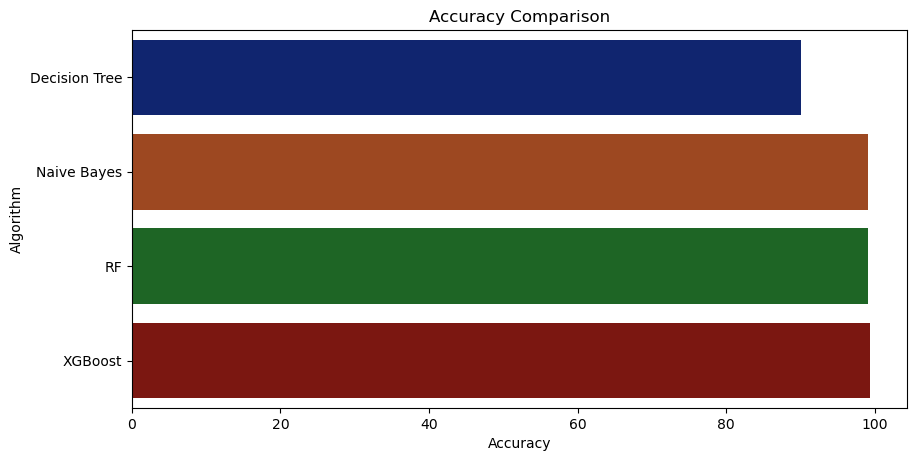

In [28]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = Model_Accuracies,y = ML_models,palette='dark')

In [29]:
# Flattening and Saving the ML models
# pickle.dump(RF, open("CR_RF.pkl",'wb'))
# pickle.dump(XB, open("CR_XB.pkl",'wb'))
# pickle.dump(NaiveBayes, open("CR_NaiveBayes.pkl",'wb'))
# pickle.dump(DecisionTree, open("CR_DecisionTree.pkl",'wb'))